# Assignment 

In [ ]:
'H:\Coding Ninja\Data Science\Part - 1\Sample Files/startup_funding.csv'

**Number of Fundings**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset
df = pd.read_csv('H:\Coding Ninja\Data Science\Part - 1\Sample Files/startup_funding.csv')

# Handle the Date column errors
df['Date'] = df['Date'].replace('12/05.2015', '12/05/2015')
df['Date'] = df['Date'].replace('13/04.2015', '13/04/2015')
df['Date'] = df['Date'].replace('15/01.2015', '15/01/2015')
df['Date'] = df['Date'].replace('22/01//2015', '22/01/2015')

# Create a new column with year
df['Year'] = pd.to_datetime(df['Date'], format='%d/%m/%Y').dt.year

# Count the number of fundings per year
funding_count = df['Year'].value_counts().sort_index()

# Plot the line graph
plt.plot(funding_count.index, funding_count.values)

# Set the title and axis labels
plt.title('Number of Fundings by Year')
plt.xlabel('Year')
plt.ylabel('Number of Fundings')

# Print the year-wise total number of fundings
for year in funding_count.index:
    print(year, funding_count[year])

plt.show()


**Top Indian Cities**

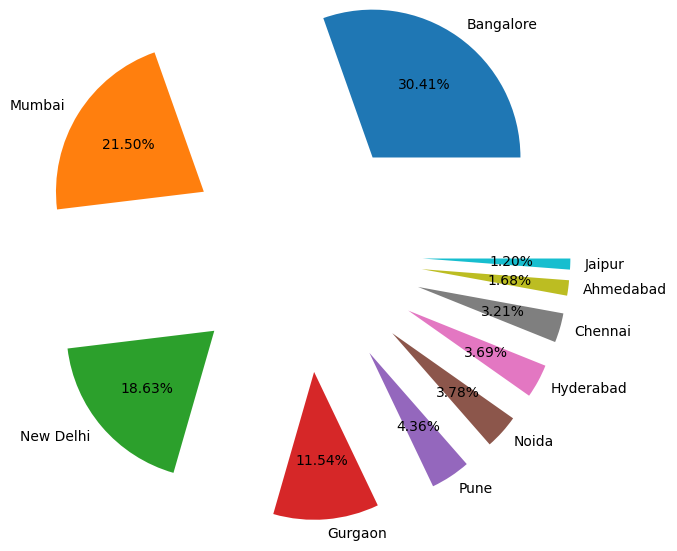

Bangalore 635
Mumbai 449
New Delhi 389
Gurgaon 241
Pune 91
Noida 79
Hyderabad 77
Chennai 67
Ahmedabad 35
Jaipur 25


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np
# Read the dataset
with open('H:\Coding Ninja\Data Science\Part - 1\Sample Files/startup_funding.csv') as file:
    file_data = csv.DictReader(file, skipinitialspace = True)
    city = []
    for i in file_data:
        city.append(i['CityLocation'])
    npcity = np.array(city)
    npcity = npcity[npcity != '']
    
    for i in range(len(npcity)):
        if 'bangalore' in npcity[i]:
            npcity[i]='Bangalore'
        if npcity[i]=='Delhi':
            npcity[i]='New Delhi'
    for i in range(len(npcity)) :
        npcity[i]=npcity[i].split('/')[0].strip()        
    
    dic=dict()
    for i in npcity:
        if i in dic.keys():
            dic[i]+=1
        else:
            dic[i]=1
    
    xaxis = []
    yaxis = []
    
    for i in dic.keys():
        xaxis.append(i)
        yaxis.append(dic[i])
    npxaxis = np.array(xaxis)
    npyaxis = np.array(yaxis)
    
    npxaxis = npxaxis[np.argsort(npyaxis)]
    npyaxis = np.sort(npyaxis)
    
    npxaxis=npxaxis[len(npxaxis)-1:len(npxaxis)-1-10:-1]
    npyaxis=npyaxis[len(npyaxis)-1:len(npyaxis)-1-10:-1]
    
    plt.pie(npyaxis, labels=npxaxis, autopct='%.2f%%', radius=1, explode=[0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8])
    plt.show()
    
    for i in range(len(npxaxis)):
        print(npxaxis[i], npyaxis[i])

**Funding Amount**

In [20]:
####### correction in student's code #####

# Importing the libraries
import pandas as pd
import numpy as np

# Load the startup funding dataset into a DataFrame
df_start = pd.read_csv('H:\Coding Ninja\Data Science\Part - 1\Sample Files/startup_funding.csv', encoding='utf-8')

# Remove rows where the 'CityLocation' column is missing or NaN
df_start['CityLocation'].dropna(inplace=True)

# Define a function to extract the city name from the 'CityLocation' column
def separateCity(city):
    return city.split('/')[0].strip()

# Apply the 'separateCity' function to the 'CityLocation' column to extract the city names
df_start['CityLocation'] = df_start['CityLocation'].apply(separateCity)

# Replace some common misspellings of city names
df_start['CityLocation'].replace("Delhi","New Delhi",inplace=True)
df_start['CityLocation'].replace("bangalore","Bangalore",inplace=True)

## Convert "AmountInUSD" into numeric format
# Remove commas and convert to float
df_start["AmountInUSD"] = df_start["AmountInUSD"].apply(lambda x: float(str(x).replace(",","")))
# Convert to numeric type
df_start["AmountInUSD"] = pd.to_numeric(df_start["AmountInUSD"])

# Group the data by city and sum the investment amounts for each city, then sort in descending order and select the top 10 cities
city_amount = df_start.groupby('CityLocation')['AmountInUSD'].sum().sort_values(ascending=False)[0:10]

# Extract the city names and corresponding investment amounts as separate arrays
city = city_amount.index
amountCity = city_amount.values

# Calculate the percentage of total investment amount for each city
perAmount = np.true_divide(amountCity, amountCity.sum())*100

# Print the top 10 cities and their percentage of total investment amount, formatted to 2 decimal places
for i in range(len(city)):
    print(city[i],format(perAmount[i],'.2f'))


Bangalore 30.41
Mumbai 21.50
New Delhi 18.63
Gurgaon 11.54
Pune 4.36
Noida 3.78
Hyderabad 3.69
Chennai 3.21
Ahmedabad 1.68
Jaipur 1.20


**Investment Type**

Private Equity 98.15
Seed Funding 1.81
Debt Funding 0.04
Crowd Funding 0.00


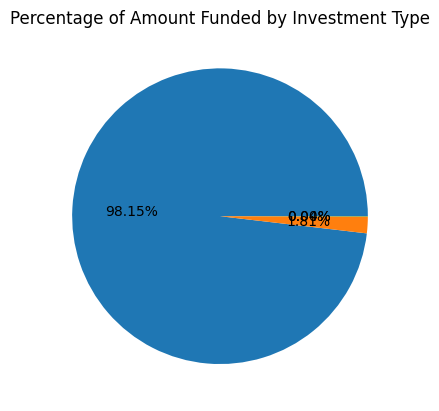

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('H:\Coding Ninja\Data Science\Part - 1\Sample Files/startup_funding.csv', encoding='utf8',skipinitialspace = True)

df['AmountInUSD'] = df['AmountInUSD'].apply(lambda x: float(str(x).replace(',','')))

df['InvestmentType'].dropna(inplace = True)

df['InvestmentType'].replace('SeedFunding','Seed Funding',inplace = True)

df['InvestmentType'].replace('PrivateEquity','Private Equity',inplace = True)

df['InvestmentType'].replace('Crowd funding','Crowd Funding',inplace = True)

Investment = df.groupby('InvestmentType')['AmountInUSD'].sum().sort_values(ascending = False)
InvestValue = Investment.values

Index = Investment.index
percent = np.true_divide(InvestValue,InvestValue.sum())*100

for i in range(len(Investment)):
    print(Index[i],format(percent[i],'.2f'))
    
# Plot a pie chart
plt.pie(Investment, autopct='%1.2f%%')
plt.title('Percentage of Amount Funded by Investment Type')
plt.show()


**Top Industries**

In [17]:
########## corrected student's submission ######

import numpy as np
import pandas as pd

df=pd.read_csv('startup_funding.csv', encoding='utf-8')
df.dropna(subset=['IndustryVertical','AmountInUSD'],inplace=True)
df['IndustryVertical'].replace('ecommerce','Ecommerce',inplace=True)
df['IndustryVertical'].replace('ECommerce','Ecommerce',inplace=True)
df['IndustryVertical'].replace('eCommerce','Ecommerce',inplace=True)

def amount_generator(amt):
    amt = amt.split(',')
    ans=""
    for i in range(len(amt)):
        ans = ans+amt[i].strip()
    return int(ans)

df['AmountInUSD']=df['AmountInUSD'].apply(amount_generator)

iv=list(df.IndustryVertical)
amt=list(df.AmountInUSD)
d={}

for i in range(len(iv)):
    d[iv[i]]=d.get(iv[i],0)+amt[i]
    
key=list(d.keys())
values=list(d.values())

key=np.array(key)
values=np.array(values)

ind=values.argsort()[::-1]
ind=ind[:5]

key=key[ind]
values=values[ind]

values=(values/sum(values))*100
values=np.round(values,decimals=2)

for i in range(len(key)):
    print(key[i],values[i])

Consumer Internet 38.44
eCommerce 24.73
ECommerce 18.57
Technology 11.17
Online Marketplace 7.09


**Top Startups**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_start=pd.read_csv('H:\Coding Ninja\Data Science\Part - 1\Sample Files/startup_funding.csv', encoding='utf8')
df_start.dropna(subset=['StartupName'],inplace=True)

df_start['StartupName'].replace("Flipkart.com","Flipkart",inplace=True)

df_start['StartupName'].replace("Ola Cabs","Ola",inplace=True)
df_start['StartupName'].replace("Olacabs","Ola",inplace=True)

df_start['StartupName'].replace("Oyo Rooms","Oyo",inplace=True)
df_start['StartupName'].replace("OYO Rooms","Oyo",inplace=True)

df_start['StartupName'].replace("OyoRooms","Oyo",inplace=True)
df_start['StartupName'].replace("Oyorooms","Oyo",inplace=True)

df_start['StartupName'].replace("Paytm Marketplace","Paytm",inplace=True)

df_start["AmountInUSD"] = df_start["AmountInUSD"].apply(lambda x: float(str(x).replace(",","")))

df_start["AmountInUSD"] = pd.to_numeric(df_start["AmountInUSD"])

industry_amount=df_start.groupby('StartupName')['AmountInUSD'].sum().sort_values(ascending=False)[0:5] # sort the value in discending order
industry=industry_amount.index

for i in range(len(industry)):

    print(industry[i])

Paytm
Flipkart
Ola
Snapdeal
Oyo


**Funding Rounds**

In [4]:
import pandas as pd
import numpy as np

# Read in the CSV file
df = pd.read_csv('H:\Coding Ninja\Data Science\Part - 1\Sample Files/startup_funding.csv', encoding='utf8')

# Drop rows where the startup name is missing
df.dropna(subset=['StartupName'], inplace=True)

# Correct the names of important startups
df['StartupName'].replace("Flipkart.com", "Flipkart", inplace=True)
df['StartupName'].replace("Ola Cabs", "Ola", inplace=True)
df['StartupName'].replace("Olacabs", "Ola", inplace=True)
df['StartupName'].replace("Oyo Rooms", "Oyo", inplace=True)
df['StartupName'].replace("OYO Rooms", "Oyo", inplace=True)
df['StartupName'].replace("OyoRooms", "Oyo", inplace=True)
df['StartupName'].replace("Oyorooms", "Oyo", inplace=True)
df['StartupName'].replace("Paytm Marketplace", "Paytm", inplace=True)

# Group the data by startup name and count the number of funding rounds
startup_rounds = df.groupby('StartupName')['SNo'].count().sort_values(ascending=False)[:5]

# Print the startup names and their respective funding rounds
for startup, rounds in startup_rounds.items():
    print(startup, rounds)


Ola 9
Swiggy 7
Paytm 6
UrbanClap 6
Oyo 6


**Top Investor**

In [5]:
import pandas as pd
import numpy as np

# Read in the CSV file
df = pd.read_csv('H:\Coding Ninja\Data Science\Part - 1\Sample Files/startup_funding.csv', encoding='utf8')

# Drop rows where the startup name or investors name is missing
df.dropna(subset=['StartupName', 'InvestorsName'], inplace=True)

# Replace various versions of startup names with a consistent name
df['StartupName'].replace(['Flipkart.com', 'Flipkart'], 'Flipkart', inplace=True)
df['StartupName'].replace(['Ola Cabs', 'Olacabs'], 'Ola', inplace=True)
df['StartupName'].replace(['Oyo Rooms', 'OYO Rooms', 'OyoRooms', 'Oyorooms'], 'Oyo', inplace=True)
df['StartupName'].replace(['Paytm Marketplace', 'Paytm'], 'Paytm', inplace=True)

# Drop rows with undisclosed investors
Undisclosed = ['Undisclosed', 'Undisclosed Investors']
df = df[~df['InvestorsName'].isin(Undisclosed)]

# Split the investors name into a list and count the occurrences of each investor
investors_counts = {}
for investors in df['InvestorsName']:
    for investor in investors.split(','):
        investor = investor.strip()
        if investor:
            investors_counts[investor] = investors_counts.get(investor, 0) + 1

# Find the investor(s) with the maximum number of investments
max_investments = np.max(list(investors_counts.values()))
max_investors = [investor for investor, count in investors_counts.items() if count == max_investments]

# Print the result
for investor in max_investors:
    print(investor, max_investments)


Sequoia Capital 64
